In [142]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.preprocessing import StandardScaler


In [143]:
df2018 = pd.read_csv('Defense2018.csv')
df2019 = pd.read_csv('Defense2019.csv')
df2020 = pd.read_csv('Defense2020.csv')
df2021 = pd.read_csv('Defense2021.csv')
df2022 = pd.read_csv('Defense2022.csv')

In [144]:
def add_year_column(df, year):
    """
    Adds a 'year' column to the DataFrame.

    Parameters:
    - df (pd.DataFrame): The original DataFrame.
    - year (int): The year to assign to the 'year' column.

    Returns:
    - pd.DataFrame: The DataFrame with the added 'year' column.
    """
    df = df.copy()
    df['year'] = year
    return df

In [145]:
# Add 'year' column to each DataFrame
df2018 = add_year_column(df2018, 2018)
df2019 = add_year_column(df2019, 2019)
df2020 = add_year_column(df2020, 2020)
df2021 = add_year_column(df2021, 2021)
df2022 = add_year_column(df2022, 2022)


In [146]:
combined_df = pd.concat([df2018, df2019, df2020, df2021, df2022])

In [147]:
combined_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,stops,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception,year
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,14,11,4,2,28,0,18,11,18.0,2018
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,20,18,7,8,54,0,72,59,14.4,2018
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,18,59,4,34,8,5,446,155,16.5,2018
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,2,9,2,15,0,0,90,62,9.0,2018
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,29,56,3,47,7,2,340,214,9.4,2018


In [148]:
combined_df['position'].unique()
offensive_positions = ['WR', 'TE', 'G', 'FB', 'T', 'QB', 'C', 'HB']
df_defense = combined_df[~combined_df['position'].isin(offensive_positions)].copy()
df_defense.reset_index(drop=True, inplace=True)

In [149]:

df_defense['position'].unique()

array(['ED', 'S', 'CB', 'LB', 'DI'], dtype=object)

In [150]:
df_defense.size

276528

In [151]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns



In [153]:
print(df_defense.columns)

Index(['player', 'player_id', 'position', 'team_name', 'player_game_count',
       'assists', 'batted_passes', 'catch_rate', 'declined_penalties',
       'forced_fumbles', 'franchise_id', 'fumble_recoveries',
       'fumble_recovery_touchdowns', 'grades_coverage_defense',
       'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense',
       'grades_run_defense', 'grades_tackle', 'hits', 'hurries',
       'interception_touchdowns', 'interceptions', 'longest',
       'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties',
       'qb_rating_against', 'receptions', 'sacks', 'safeties',
       'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage',
       'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap',
       'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t',
       'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball',
       'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot',
       'stops', 'tackles'

In [154]:
snap_columns = [col for col in df_defense.columns if 'snap_counts_' in col]

# Calculate total snap counts per player
df_defense['total_snap_counts'] = df_defense[snap_columns].sum(axis=1) 

In [155]:
# Calculate percentile thresholds
high_threshold = df_defense['total_snap_counts'].quantile(0.75)
low_threshold = df_defense['total_snap_counts'].quantile(0.25)

In [156]:
filtered_df = df_defense[df_defense['total_snap_counts'] >= low_threshold].copy()

# Reset the index of the new DataFrame
filtered_df.reset_index(drop=True, inplace=True)

In [157]:
filtered_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception,year,total_snap_counts
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,11,4,2,28,0,18,11,18.0,2018,2024
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,18,7,8,54,0,72,59,14.4,2018,2972
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,59,4,34,8,5,446,155,16.5,2018,3752
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,9,2,15,0,0,90,62,9.0,2018,592
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,56,3,47,7,2,340,214,9.4,2018,2596


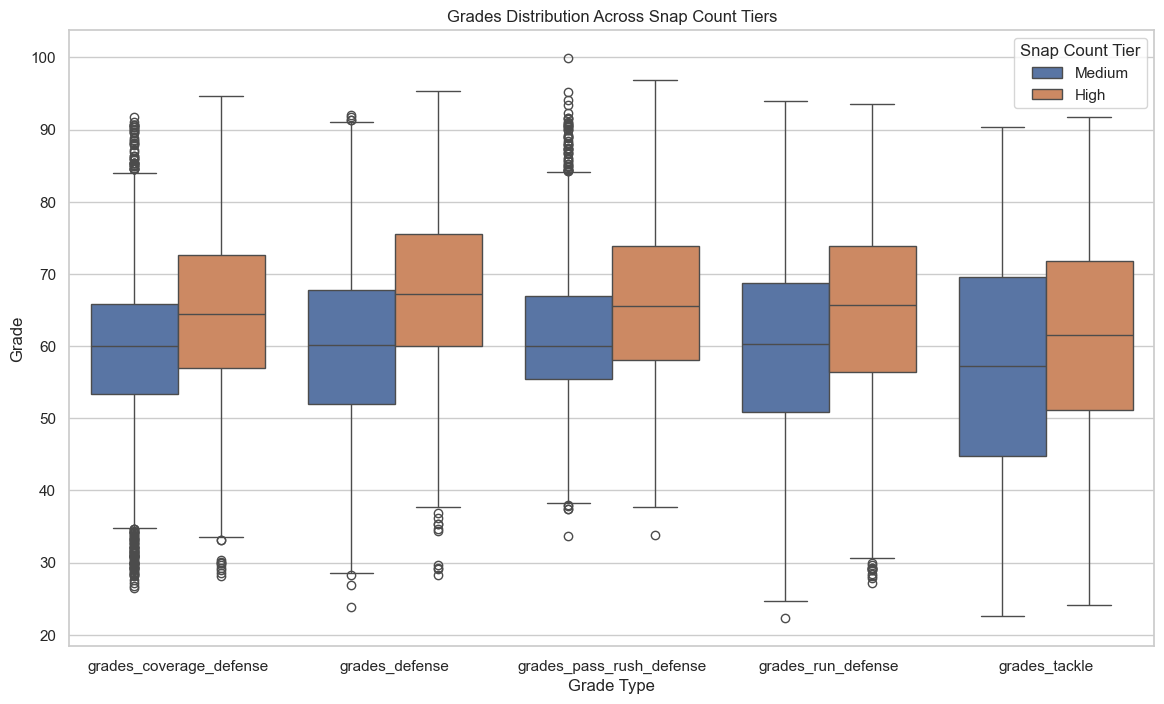

In [158]:
# Create snap count tiers
filtered_df['snap_count_tier'] = np.where(filtered_df['total_snap_counts'] >= high_threshold, 'High', 'Medium')

# Define grade columns
grade_columns = ['grades_coverage_defense', 'grades_defense', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']

# Melt the DataFrame for easier plotting
melted_df = filtered_df.melt(id_vars='snap_count_tier', value_vars=grade_columns, var_name='Grade Type', value_name='Grade')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Grade Type', y='Grade', hue='snap_count_tier', data=melted_df)
plt.title('Grades Distribution Across Snap Count Tiers')
plt.xlabel('Grade Type')
plt.ylabel('Grade')
plt.legend(title='Snap Count Tier')
plt.show()


In [159]:
sns.set(style="whitegrid")

In [160]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


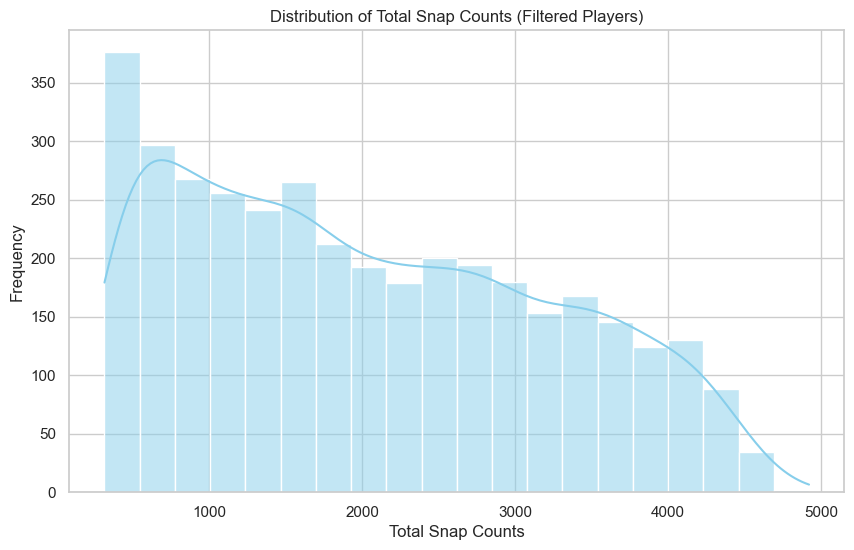

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['total_snap_counts'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Snap Counts (Filtered Players)')
plt.xlabel('Total Snap Counts')

plt.ylabel('Frequency')
plt.show()


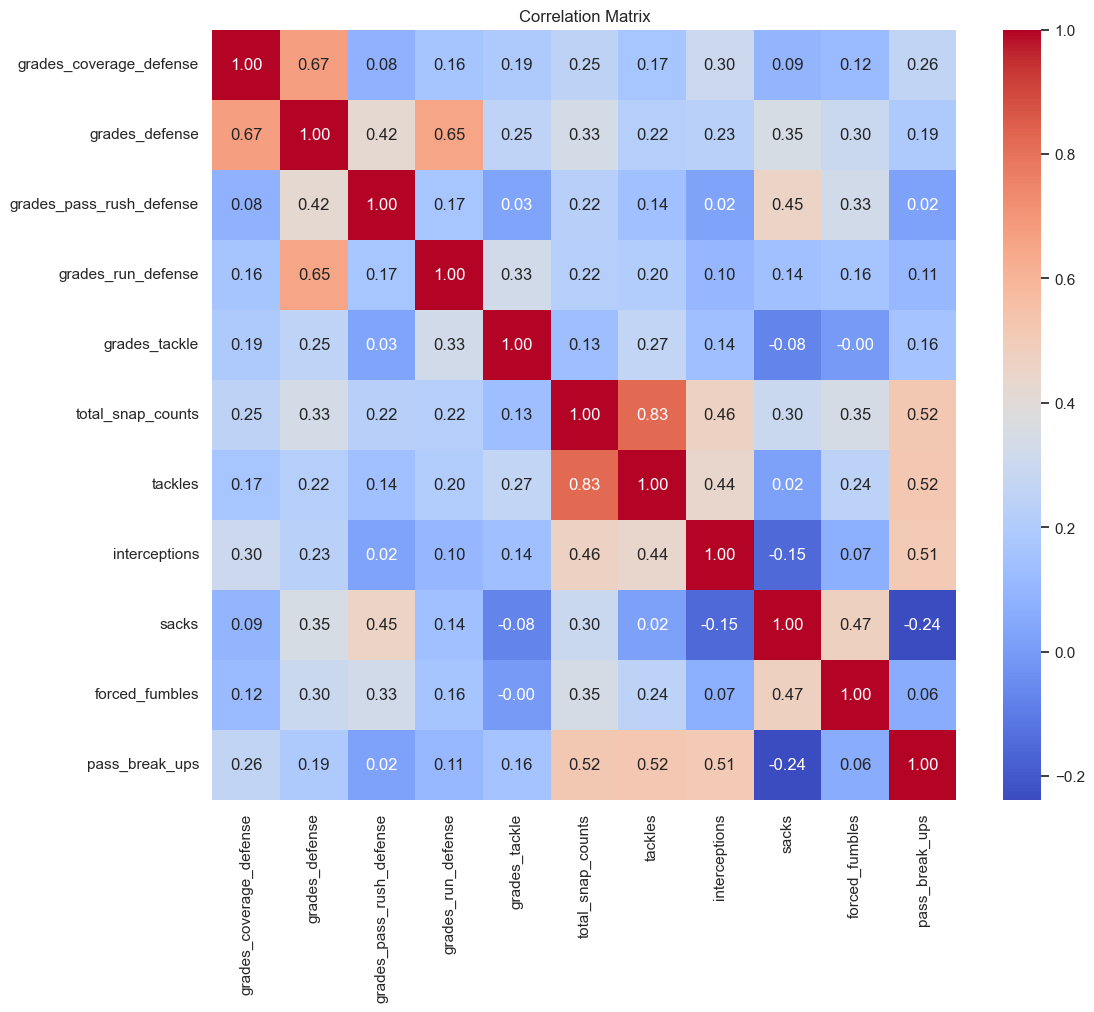

In [162]:
# Select relevant columns for correlation
corr_columns = grade_columns + ['total_snap_counts'] + ['tackles', 'interceptions', 'sacks', 'forced_fumbles', 'pass_break_ups']
corr_matrix = filtered_df[corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


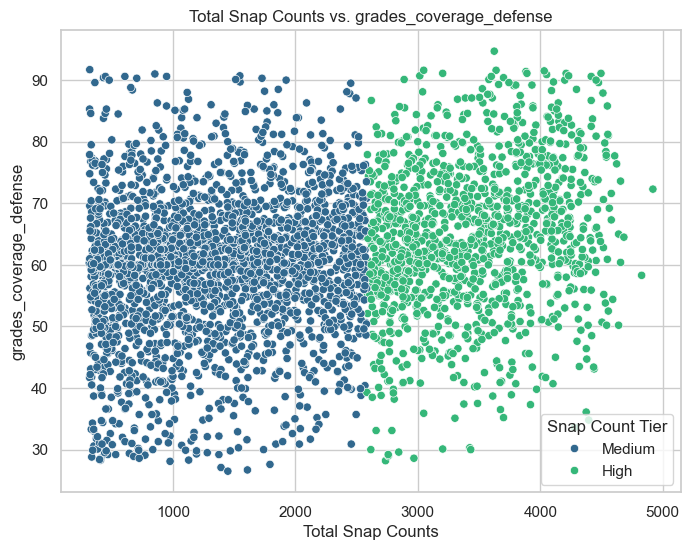

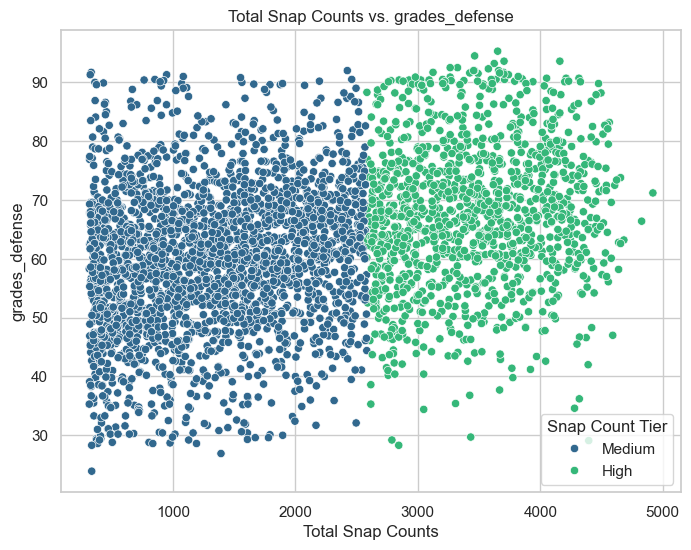

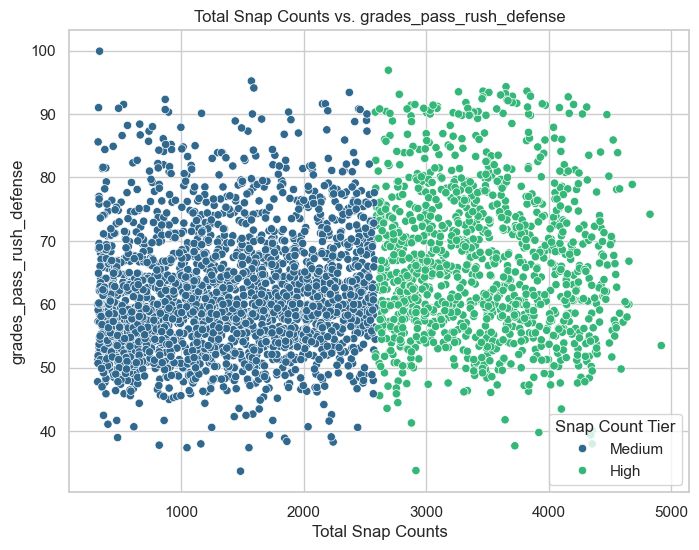

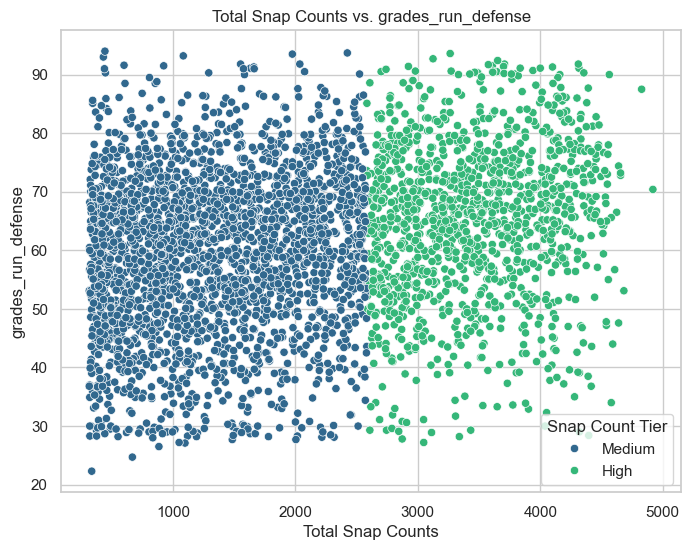

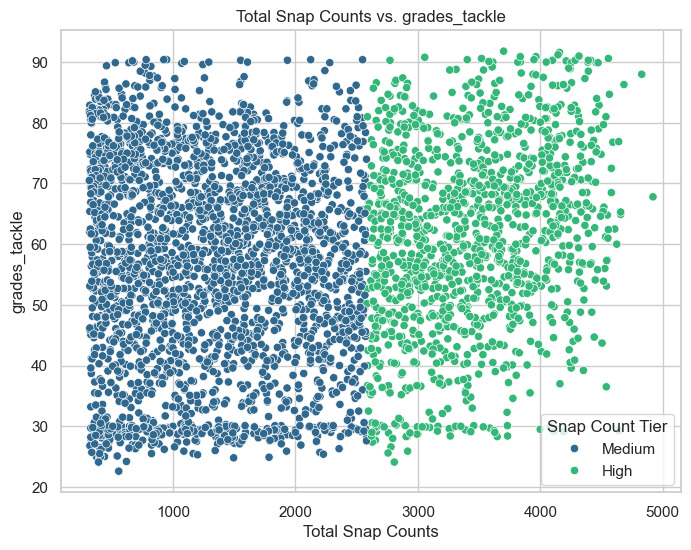

In [163]:
for grade in grade_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=filtered_df, x='total_snap_counts', y=grade, hue='snap_count_tier', palette='viridis')
    plt.title(f'Total Snap Counts vs. {grade}')
    plt.xlabel('Total Snap Counts')
    plt.ylabel(grade)
    plt.legend(title='Snap Count Tier')
    plt.show()


In [164]:
# Now that we have investigated the snap counts, we jump to the actual machine learning portion

In [165]:
# Define target variables
targets = ['grades_coverage_defense', 'grades_defense', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']

# Define feature variables: exclude identifiers, grades, and snap counts
exclude_columns = [ 'player', 'player_id', 'position', 'team_name', 'season', 'total_snap_counts', 'franchise_id', 'position', 'team_name', 'snap_count_tier']
feature_columns = [col for col in filtered_df.columns if col not in exclude_columns ]
players = filtered_df['player']
print(f"Number of Features: {len(feature_columns)}")
print(f"Features: {feature_columns}")


Number of Features: 51
Features: ['player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards_after_catch', 'yards_per_reception', 'year']


In [166]:
filtered_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception,year,total_snap_counts,snap_count_tier
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,4,2,28,0,18,11,18.0,2018,2024,Medium
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,7,8,54,0,72,59,14.4,2018,2972,High
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,4,34,8,5,446,155,16.5,2018,3752,High
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,2,15,0,0,90,62,9.0,2018,592,Medium
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,3,47,7,2,340,214,9.4,2018,2596,High


In [167]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature variables
filtered_df_scaled = filtered_df.copy()
filtered_df_scaled[feature_columns] = scaler.fit_transform(filtered_df_scaled[feature_columns])

# Verify scaling
print(filtered_df_scaled[feature_columns].tail())

      player_game_count   assists  batted_passes  catch_rate  \
3699          -0.904137 -0.019836      -0.456657   -0.302195   
3700           0.627733 -0.555162      -0.456657   -0.369045   
3701           0.117110 -0.153668      -0.456657   -0.384472   
3702          -2.180696 -0.688994      -0.456657   -0.872995   
3703          -0.904137 -0.555162      -0.456657   -0.302195   

      declined_penalties  forced_fumbles  fumble_recoveries  \
3699            1.010864        0.564832          -0.530872   
3700            1.010864        0.564832          -0.530872   
3701            1.010864       -0.551570          -0.530872   
3702           -0.485635       -0.551570          -0.530872   
3703           -0.485635       -0.551570          -0.530872   

      fumble_recovery_touchdowns  grades_coverage_defense  grades_defense  \
3699                   -0.157528                -0.355222       -0.260907   
3700                   -0.157528                 0.781417        0.595923   
3701 

In [168]:
from sklearn.model_selection import train_test_split

# Define features (X) and targets (y)
X = filtered_df_scaled[feature_columns]
y = filtered_df_scaled[targets]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (2963, 51)
Testing Set Shape: (741, 51)


In [169]:
#Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [171]:
lr_model = LinearRegression()

In [172]:
# Check if 'grades_defense' exists in the original DataFrame
print("Columns in df_defense:")
print(df_defense.columns.tolist())

# Check if 'grades_defense' exists in the filtered and scaled DataFrame
print("\nColumns in filtered_df_scaled:")
print(filtered_df_scaled.columns.tolist())


Columns in df_defense:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards

In [173]:
# Display all column names to verify 'grades_defense' exists
print("Columns in filtered_df:")
print(filtered_df.columns.tolist())


Columns in filtered_df:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yard

In [174]:
# Display all column names to verify 'grades_defense' exists
print("Columns in filtered_df_scaled:")
print(filtered_df_scaled.columns.tolist())


Columns in filtered_df_scaled:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards'

In [175]:
# Display the first few rows to inspect 'grades_defense'
print("\nSample data from filtered_df_scaled:")
print(filtered_df_scaled[['grades_defense'] + ['player']].head())



Sample data from filtered_df_scaled:
   grades_defense            player
0        1.076388    Julius Peppers
1        0.700023     Terrell Suggs
2       -1.053675        Mike Adams
3        0.147488        Adam Jones
4        0.924240  Thomas Davis Sr.


In [176]:
print("Missing values before dropping:")
print(filtered_df_scaled.isnull().sum())

Missing values before dropping:
player                           0
player_id                        0
position                         0
team_name                        0
player_game_count                0
assists                          0
batted_passes                    0
catch_rate                     947
declined_penalties               0
forced_fumbles                   0
franchise_id                     0
fumble_recoveries                0
fumble_recovery_touchdowns       0
grades_coverage_defense         92
grades_defense                   0
grades_defense_penalty           0
grades_pass_rush_defense       249
grades_run_defense               0
grades_tackle                    0
hits                             0
hurries                          0
interception_touchdowns          0
interceptions                    0
longest                       1017
missed_tackle_rate               2
missed_tackles                   0
pass_break_ups                   0
penalties              

In [177]:
filtered_df_scaled = filtered_df_scaled.drop(columns=['catch_rate', 'yards_per_reception', 'longest'])

In [178]:
grade_coverage_25th = filtered_df_scaled['grades_coverage_defense'].quantile(0.25)
missed_tackle_25th = filtered_df_scaled['missed_tackles'].quantile(0.25)
missed_tackle_rate_25th = filtered_df_scaled['missed_tackle_rate'].quantile(0.25)
grades_pass_rush_25th = filtered_df_scaled['grades_pass_rush_defense'].quantile(0.25)

In [179]:
filtered_df_scaled['grades_coverage_defense'].fillna(grade_coverage_25th, inplace=True)
filtered_df_scaled['missed_tackles'].fillna(missed_tackle_25th, inplace=True)
filtered_df_scaled['missed_tackle_rate'].fillna(missed_tackle_rate_25th, inplace=True)
filtered_df_scaled['grades_pass_rush_defense'].fillna(grades_pass_rush_25th, inplace=True)


C:\Users\achin\AppData\Local\Temp\ipykernel_59280\1943259780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df_scaled['grades_coverage_defense'].fillna(grade_coverage_25th, inplace=True)
C:\Users\achin\AppData\Local\Temp\ipykernel_59280\1943259780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [180]:
filtered_df_scaled.isnull().sum()

player                        0
player_id                     0
position                      0
team_name                     0
player_game_count             0
assists                       0
batted_passes                 0
declined_penalties            0
forced_fumbles                0
franchise_id                  0
fumble_recoveries             0
fumble_recovery_touchdowns    0
grades_coverage_defense       0
grades_defense                0
grades_defense_penalty        0
grades_pass_rush_defense      0
grades_run_defense            0
grades_tackle                 0
hits                          0
hurries                       0
interception_touchdowns       0
interceptions                 0
missed_tackle_rate            0
missed_tackles                0
pass_break_ups                0
penalties                     0
qb_rating_against             0
receptions                    0
sacks                         0
safeties                      0
snap_counts_box               0
snap_cou

In [181]:
filtered_df_scaled.columns.tolist()

['player',
 'player_id',
 'position',
 'team_name',
 'player_game_count',
 'assists',
 'batted_passes',
 'declined_penalties',
 'forced_fumbles',
 'franchise_id',
 'fumble_recoveries',
 'fumble_recovery_touchdowns',
 'grades_coverage_defense',
 'grades_defense',
 'grades_defense_penalty',
 'grades_pass_rush_defense',
 'grades_run_defense',
 'grades_tackle',
 'hits',
 'hurries',
 'interception_touchdowns',
 'interceptions',
 'missed_tackle_rate',
 'missed_tackles',
 'pass_break_ups',
 'penalties',
 'qb_rating_against',
 'receptions',
 'sacks',
 'safeties',
 'snap_counts_box',
 'snap_counts_corner',
 'snap_counts_coverage',
 'snap_counts_defense',
 'snap_counts_dl',
 'snap_counts_dl_a_gap',
 'snap_counts_dl_b_gap',
 'snap_counts_dl_outside_t',
 'snap_counts_dl_over_t',
 'snap_counts_fs',
 'snap_counts_offball',
 'snap_counts_pass_rush',
 'snap_counts_run_defense',
 'snap_counts_slot',
 'stops',
 'tackles',
 'tackles_for_loss',
 'targets',
 'total_pressures',
 'touchdowns',
 'yards',
 'ya

In [182]:
# Define target columns (assuming they start with 'grades_')
targets = [col for col in filtered_df_scaled.columns if col.startswith('grades_')]

print(f"Identified Targets: {targets}")

Identified Targets: ['grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']


In [183]:
# Assign y as all grade columns
y = filtered_df_scaled[targets]
# Exclude 'player' and grade columns from features
exclude_columns = ['player', 'position', 'team_name', 'snap_count_tier'] + targets
feature_columns = [col for col in filtered_df_scaled.columns if col not in exclude_columns]

print(f"Number of Features: {len(feature_columns)}")
print(f"Features: {feature_columns}")


Number of Features: 45
Features: ['player_id', 'player_game_count', 'assists', 'batted_passes', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards_after_catch', 'year', 'total_snap_counts']


In [184]:
# Extract 'player' column as labels
labels = filtered_df_scaled['player']

print(f"Number of Labels: {labels.shape[0]}")
print(labels.head())


Number of Labels: 3704
0      Julius Peppers
1       Terrell Suggs
2          Mike Adams
3          Adam Jones
4    Thomas Davis Sr.
Name: player, dtype: object


In [185]:
# Extract label columns
labels = filtered_df_scaled[['player', 'position', 'team_name', 'snap_count_tier']]

print(f"Number of Labels: {labels.shape[0]}")
print(labels.head())


Number of Labels: 3704
             player position team_name snap_count_tier
0    Julius Peppers       ED       CAR          Medium
1     Terrell Suggs       ED       BLT            High
2        Mike Adams        S       CAR            High
3        Adam Jones       CB       DEN          Medium
4  Thomas Davis Sr.       LB       CAR            High


In [186]:
# Assign features (X) and targets (y)
X = filtered_df_scaled[feature_columns]
y = filtered_df_scaled[targets]

print(f"\nFeatures Shape: {X.shape}")
print(f"Targets Shape: {y.shape}")


Features Shape: (3704, 45)
Targets Shape: (3704, 6)


In [187]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(
    X, y, labels, test_size=0.2, random_state=42
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (2963, 45)
Testing Set Shape: (741, 45)


In [188]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("\nSample of scaled training features:")
print(X_train_scaled_df.head())



Sample of scaled training features:
      player_id  player_game_count   assists  batted_passes  \
296   -0.780353           0.873670 -0.691703       2.431156   
1281   0.945501          -0.403936 -0.559442      -0.454482   
507   -0.677113           0.873670 -0.559442      -0.454482   
7     -1.066305           0.107107 -0.427181       0.507397   
3508   1.256811          -0.148414 -0.691703      -0.454482   

      declined_penalties  forced_fumbles  franchise_id  fumble_recoveries  \
296             6.889385       -0.549987     -1.558165           1.075719   
1281           -0.483212        0.568484      0.062424          -0.526772   
507             5.414866       -0.549987     -1.342086          -0.526772   
7              -0.483212        0.568484      0.818699          -0.526772   
3508           -0.483212       -0.549987      0.818699          -0.526772   

      fumble_recovery_touchdowns      hits  ...     stops   tackles  \
296                     5.437622  0.215090  ... -0

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


lr_model = LinearRegression()

target_grade = 'grades_defense'  # Change as needed

# Train the model
lr_model.fit(X_train_scaled_df, y_train[target_grade])

# Predict on the testing set
y_pred_lr = lr_model.predict(X_test_scaled_df)

# Evaluate the model
mse_lr = mean_squared_error(y_test[target_grade], y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test[target_grade], y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")


Linear Regression Performance:
Mean Squared Error (MSE): 0.4378
Root Mean Squared Error (RMSE): 0.6617
R-squared (R²): 0.5617


In [190]:
#Neural Network time



In [191]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score



In [192]:
filtered_Df_scaled = filtered_df_scaled

In [193]:
print(f"\nFeatures Shape: {X.shape}")
print(f"Targets Shape: {y.shape}")
print(f"Labels Shape: {labels.shape}")


Features Shape: (3704, 45)
Targets Shape: (3704, 6)
Labels Shape: (3704, 4)


In [194]:
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(X, y, labels, test_size = 0.2, random_state = 42)

In [195]:
scaler = StandardScaler()

In [196]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nSample of scaled training features:")
print(X_train_scaled_df.head())


Sample of scaled training features:
      player_id  player_game_count   assists  batted_passes  \
296   -0.780353           0.873670 -0.691703       2.431156   
1281   0.945501          -0.403936 -0.559442      -0.454482   
507   -0.677113           0.873670 -0.559442      -0.454482   
7     -1.066305           0.107107 -0.427181       0.507397   
3508   1.256811          -0.148414 -0.691703      -0.454482   

      declined_penalties  forced_fumbles  franchise_id  fumble_recoveries  \
296             6.889385       -0.549987     -1.558165           1.075719   
1281           -0.483212        0.568484      0.062424          -0.526772   
507             5.414866       -0.549987     -1.342086          -0.526772   
7              -0.483212        0.568484      0.818699          -0.526772   
3508           -0.483212       -0.549987      0.818699          -0.526772   

      fumble_recovery_touchdowns      hits  ...     stops   tackles  \
296                     5.437622  0.215090  ... -0

In [197]:
input_dim = X_train_scaled.shape[1]

In [198]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(targets), activation='linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
model.summary()

c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,854 (65.84 KB)

 Trainable params: 16,854 (65.84 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled_df, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    #callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9866 - mae: 0.7934 - val_loss: 0.8296 - val_mae: 0.7265
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8364 - mae: 0.7242 - val_loss: 0.7191 - val_mae: 0.6696
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7649 - mae: 0.6873 - val_loss: 0.6693 - val_mae: 0.6420
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7173 - mae: 0.6669 - val_loss: 0.6460 - val_mae: 0.6308
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6685 - mae: 0.6386 - val_loss: 0.6266 - val_mae: 0.6201
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6555 - mae: 0.6347 - val_loss: 0.5947 - val_mae: 0.6010
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6334 - mae: 0.6141 - val_loss: 0.5661 - val_mae: 0.5828
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6302 - mae: 0.6146 - val_loss: 0.5687 - val_mae: 0.5833
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

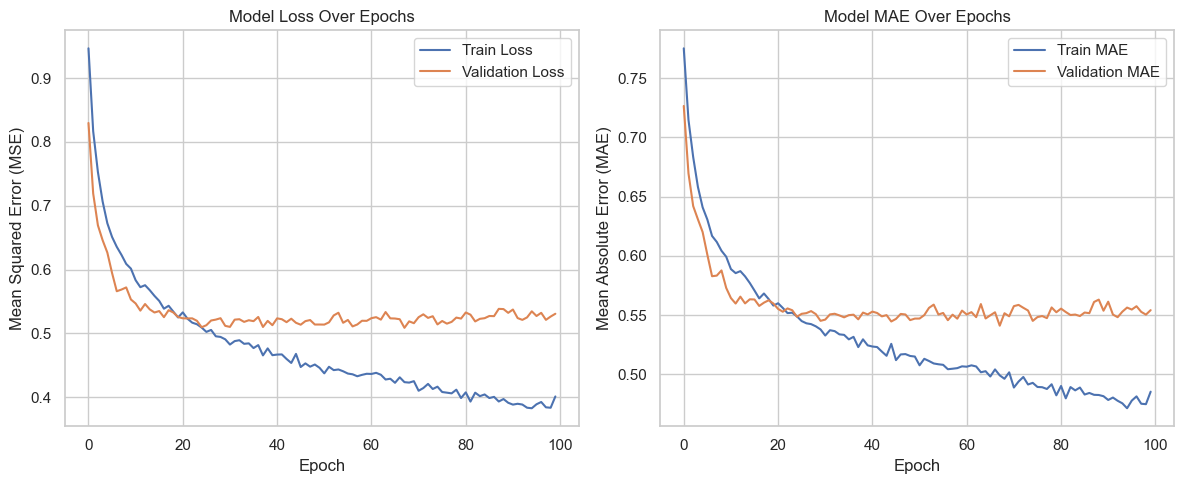

In [200]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [201]:
#model evaluation

In [202]:
y_pred_nn = model.predict(X_test_scaled_df)
results = pd.DataFrame(y_test).reset_index(drop=True)
predictions = pd.DataFrame(y_pred_nn, columns=targets).reset_index(drop=True)
comparision = pd.concat([results, predictions], axis=1)
comparision.columns = [f"Actual_{col}" for col in targets] + targets
print(comparision.head(10))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Actual_grades_coverage_defense  Actual_grades_defense  \
0                        0.705076               0.187527   
1                       -0.202539              -0.429070   
2                        0.730523               0.820140   
3                        0.722041               0.563891   
4                       -0.923542              -0.749380   
5                        0.883206              -0.236884   
6                       -0.219504               0.163504   
7                       -0.049856               2.189465   
8                        1.315808               0.067411   
9                       -0.126198               0.211550   

   Actual_grades_defense_penalty  Actual_grades_pass_rush_defense  \
0                      -0.342993                        -0.653693   
1                       0.740636                        -1.301979   
2                      -1.094474                         2.065236   
3                       

In [203]:
for grade in targets:
    mse = mean_squared_error(y_test[grade], comparision[grade])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[grade], comparision[grade])
    print(f"\n{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


grades_coverage_defense - MSE: 0.6209, RMSE: 0.7880, R²: 0.3677

grades_defense - MSE: 0.4724, RMSE: 0.6873, R²: 0.5272

grades_defense_penalty - MSE: 0.5949, RMSE: 0.7713, R²: 0.4610

grades_pass_rush_defense - MSE: 0.5958, RMSE: 0.7719, R²: 0.3850

grades_run_defense - MSE: 0.7275, RMSE: 0.8530, R²: 0.2801

grades_tackle - MSE: 0.2379, RMSE: 0.4877, R²: 0.7764


In [204]:
#now we have to fine tune the model in many different ways
# filter between front 7 and secondary
# use optuna hyperparameter tuning
# use different weights for different features
# incorporate cap space and resource allocation into this model

In [205]:
# Using feature attention layers to determine which features are more important and adjusts the model

In [206]:
from tensorflow.keras.layers import Input, Attention
from tensorflow.keras.models import Model


In [207]:
input_layer = Input(shape=(input_dim,))

In [208]:
attention = Dense(64, activation='relu')(input_layer)
attention = Dropout(0.2)(attention)
attention = Dense(32, activation='relu')(attention)
combined = tf.keras.layers.concatenate([input_layer, attention])

In [209]:
#Hidden layers
dense1 = Dense(128, activation='relu')(combined)
drop1 = Dropout(0.3)(dense1 )
dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.2)(dense2)

In [210]:
output = Dense(len(targets), activation='linear')(drop2)
model_attention = Model(inputs=input_layer, outputs=output)
model_attention.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_attention.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 45)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      2,944 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │      2,080 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 77)        │          0 │ input_layer_4[0]… │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │      9,984 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 128)       │          0 │ dense_18[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 64)        │      8,256 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64)        │          0 │ dense_19[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 6)         │        390 │ dropout_12[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,654 (92.40 KB)

 Trainable params: 23,654 (92.40 KB)

 Non-trainable params: 0 (0.00 B)

In [211]:
history_attention = model_attention.fit(X_train_scaled_df, y_train, epochs=100, batch_size=16, validation_split=0.2, 
                                        #callbacks=[early_stop]
                                        verbose=1)

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0215 - mae: 0.7982 - val_loss: 0.7236 - val_mae: 0.6738
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7328 - mae: 0.6707 - val_loss: 0.6159 - val_mae: 0.6102
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6603 - mae: 0.6273 - val_loss: 0.5691 - val_mae: 0.5785
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6320 - mae: 0.6109 - val_loss: 0.5478 - val_mae: 0.5672
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5842 - mae: 0.5882 - val_loss: 0.5336 - val_mae: 0.5571
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5376 - mae: 0.5610 - val_loss: 0.5116 - val_mae: 0.5441
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5359 - mae: 0.5601 - val_loss: 0.5168 - val_mae: 0.5491
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5438 - mae: 0.5639 - val_loss: 0.5089 - val_mae: 0.5420
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [212]:
# Predict on the testing set using the attention model
y_pred_attention = model_attention.predict(X_test_scaled_df)

# Create a DataFrame to compare actual and predicted values
results_attention = pd.DataFrame(y_test).reset_index(drop=True)
predictions_attention = pd.DataFrame(y_pred_attention, columns=targets).reset_index(drop=True)
comparison_attention = pd.concat([results_attention, predictions_attention], axis=1)
comparison_attention.columns = [f"Actual_{col}" for col in targets] + targets

# Display the first few rows of the comparison DataFrame
print(comparison_attention.head(10))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Actual_grades_coverage_defense  Actual_grades_defense  \
0                        0.705076               0.187527   
1                       -0.202539              -0.429070   
2                        0.730523               0.820140   
3                        0.722041               0.563891   
4                       -0.923542              -0.749380   
5                        0.883206              -0.236884   
6                       -0.219504               0.163504   
7                       -0.049856               2.189465   
8                        1.315808               0.067411   
9                       -0.126198               0.211550   

   Actual_grades_defense_penalty  Actual_grades_pass_rush_defense  \
0                      -0.342993                        -0.653693   
1                       0.740636                        -1.301979   
2                      -1.094474                         2.065236   
3                       

In [213]:
for grade in targets:
    mse = mean_squared_error(y_test[grade], comparison_attention[grade])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[grade], comparison_attention[grade])
    print(f"\n{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


grades_coverage_defense - MSE: 0.6033, RMSE: 0.7767, R²: 0.3856

grades_defense - MSE: 0.4530, RMSE: 0.6730, R²: 0.5466

grades_defense_penalty - MSE: 0.5448, RMSE: 0.7381, R²: 0.5063

grades_pass_rush_defense - MSE: 0.5403, RMSE: 0.7351, R²: 0.4423

grades_run_defense - MSE: 0.7403, RMSE: 0.8604, R²: 0.2675

grades_tackle - MSE: 0.1991, RMSE: 0.4462, R²: 0.8128


In [214]:
# split into position groups and see if the model performs better
# analyze feature importance for different position groups and identify if they are the same or different
# proceed to the investigation of cap data, grouping by year, team and position group to give it a score and identify corrleation to cap data
# use the cap data to predict the grade of the player in the future?
# Also use draft capital data?
# use past data to predict future data

In [215]:
filtered_Df_scaled['lag_1_grades_defense_penalty'] = filtered_Df_scaled['grades_defense_penalty'].shift(1)

# Handle NaN values
filtered_Df_scaled = filtered_Df_scaled.dropna().reset_index(drop=True)




In [216]:
filtered_Df_scaled['change_grades_defense_penalty'] = filtered_Df_scaled['grades_defense_penalty'].diff()

# Handle NaN values
filtered_Df_scaled = filtered_Df_scaled.dropna().reset_index(drop=True)


In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM [samples, timesteps, features]
# Since each year is a separate sample, you might need to define timesteps based on your data structure

# Example assuming timesteps=1
X_train_reshaped = X_train_scaled_df.values.reshape((X_train_scaled_df.shape[0], 1, X_train_scaled_df.shape[1]))
X_test_reshaped = X_test_scaled_df.values.reshape((X_test_scaled_df.shape[0], 1, X_test_scaled_df.shape[1]))

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(len(targets), activation='linear'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_lstm = model_lstm.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)



c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [218]:
# Predict on the test set
y_pred = model_lstm.predict(X_test_reshaped)
 
 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [219]:
predictions = pd.DataFrame(y_pred, columns=targets)
predictions = predictions.rename(columns=lambda x: f"Predicted_{x}").reset_index(drop=True)

print("Predictions Columns:", predictions.columns.tolist())

Predictions Columns: ['Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']


In [220]:
# Create a DataFrame for actual values
results = pd.DataFrame(y_test)
results = results.rename(columns=lambda x: f"Actual_{x}").reset_index(drop=True)

print("Actual Results Columns:", results.columns.tolist())


Actual Results Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle']


In [221]:
# Concatenate actual and predicted DataFrames side by side
comparision_attention = pd.concat([results, predictions], axis=1)

print("\ncomparision_attention DataFrame Columns:", comparision_attention.columns.tolist())



comparision_attention DataFrame Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle', 'Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']


In [222]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize a list to store metrics
metrics_summary = []

# Iterate through each target to calculate metrics
for grade in targets:
    actual = comparision_attention[f"Actual_{grade}"]
    predicted = comparision_attention[f"Predicted_{grade}"]
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    
    # Append metrics to the summary list
    metrics_summary.append({
        'Grade': grade,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f"\n{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")



grades_coverage_defense - MSE: 0.5461, RMSE: 0.7390, R²: 0.4439

grades_defense - MSE: 0.4009, RMSE: 0.6332, R²: 0.5987

grades_defense_penalty - MSE: 0.5005, RMSE: 0.7074, R²: 0.5466

grades_pass_rush_defense - MSE: 0.5471, RMSE: 0.7397, R²: 0.4353

grades_run_defense - MSE: 0.6771, RMSE: 0.8228, R²: 0.3301

grades_tackle - MSE: 0.1661, RMSE: 0.4075, R²: 0.8438


In [223]:
# Convert metrics_summary to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_summary)

# Display the metrics summary
print("\n=== Evaluation Metrics Summary ===")
print(metrics_df)



=== Evaluation Metrics Summary ===
                      Grade       MSE      RMSE        R2
0   grades_coverage_defense  0.546058  0.738957  0.443871
1            grades_defense  0.400893  0.633161  0.598698
2    grades_defense_penalty  0.500456  0.707429  0.546552
3  grades_pass_rush_defense  0.547145  0.739692  0.435278
4        grades_run_defense  0.677073  0.822844  0.330064
5             grades_tackle  0.166088  0.407538  0.843836


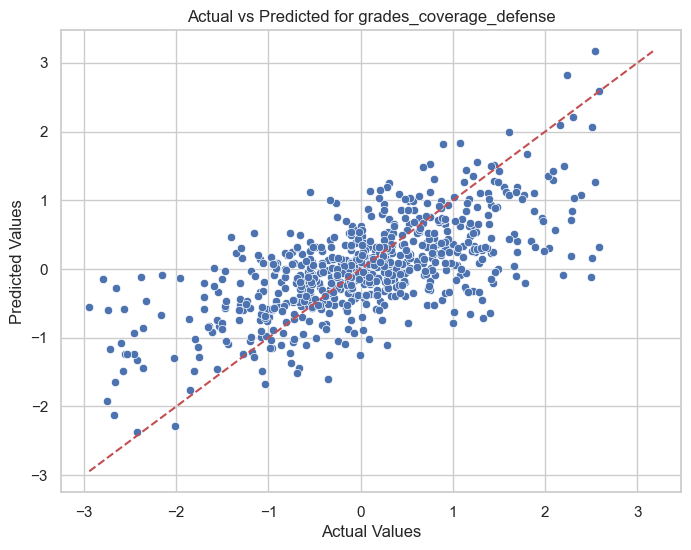

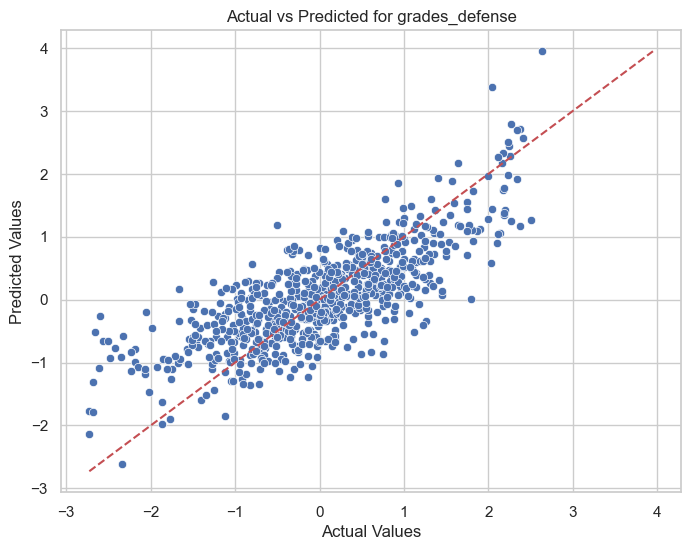

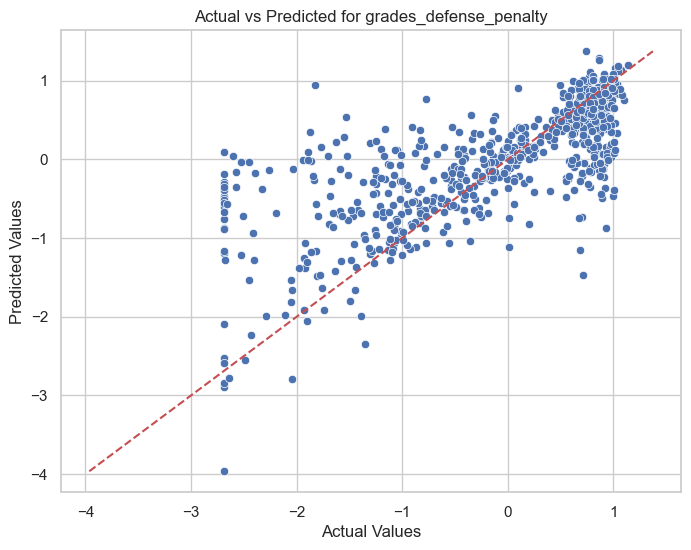

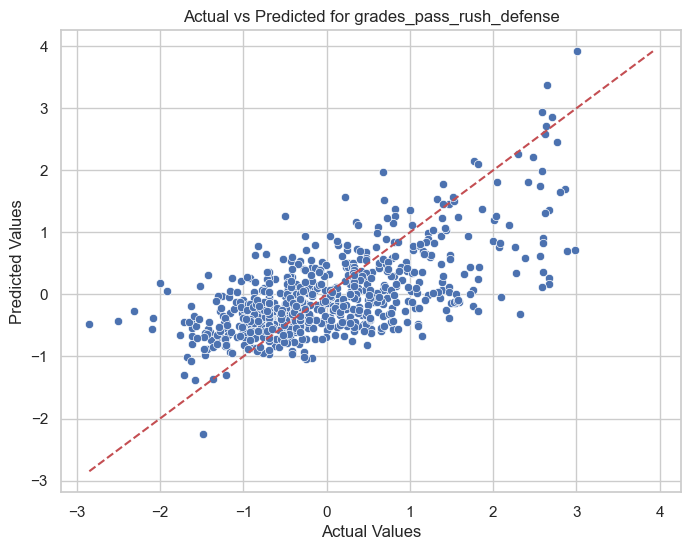

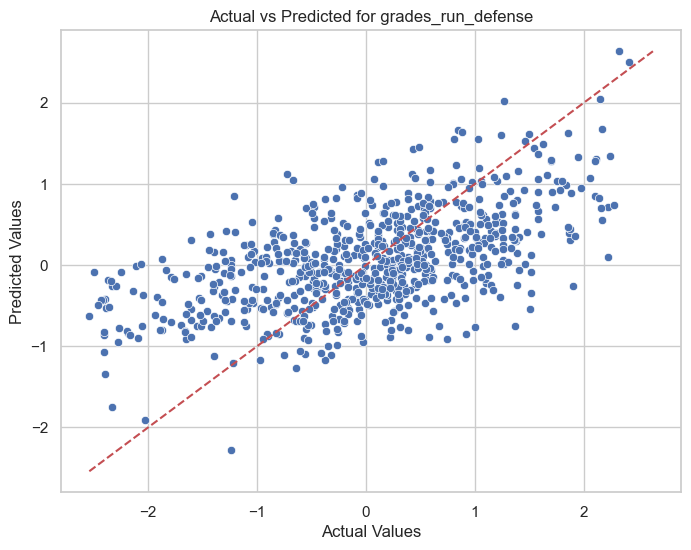

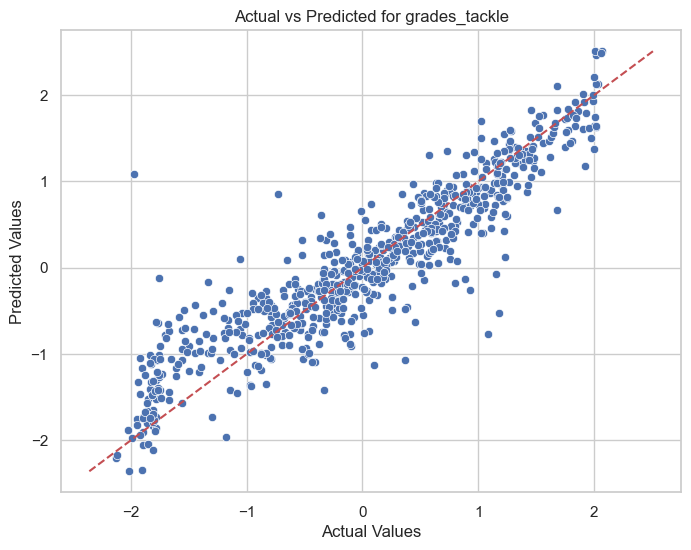

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(comparision_attention, grade):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=f"Actual_{grade}", y=f"Predicted_{grade}", data=comparision_attention)
    # Plot a reference line y = x
    min_val = min(comparision_attention[f"Actual_{grade}"].min(), comparision_attention[f"Predicted_{grade}"].min())
    max_val = max(comparision_attention[f"Actual_{grade}"].max(), comparision_attention[f"Predicted_{grade}"].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title(f'Actual vs Predicted for {grade}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Example usage for all grades
for grade in targets:
    plot_actual_vs_predicted(comparision_attention, grade)



--- Training on -1.4538030679873242 and Testing on -0.7421753999781966 ---


c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
comparision_attention DataFrame Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle', 'Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']
grades_coverage_defense - MSE: 0.7240, RMSE: 0.8509, R²: 0.3028
grades_defense - MSE: 0.4709, RMSE: 0.6862, R²: 0.4907
grades_defense_penalty - MSE: 0.5632, RMSE: 0.7505, R²: 0.4959
grades_pass_rush_defense - MSE: 0.6762, RMSE: 0.8223, R²: 0.2891
grades_run_defense - MSE: 0.6705, RMSE: 0.8189, R²: 0.2149
grades_tackle - MSE: 0.2577, RMSE: 0.5077, R²: 0.7473

--- Training on -0.7421753999781966 and Testing on -0.030547731969069077 ---


c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
comparision_attention DataFrame Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle', 'Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']
grades_coverage_defense - MSE: 0.6495, RMSE: 0.8059, R²: 0.3532
grades_defense - MSE: 0.5567, RMSE: 0.7461, R²: 0.4635
grades_defense_penalty - MSE: 0.4942, RMSE: 0.7030, R²: 0.4973
grades_pass_rush_defense - MSE: 0.7555, RMSE: 0.8692, R²: 0.2770
grades_run_defense - MSE: 0.8613, RMSE: 0.9280, R²: 0.1465
grades_tackle - MSE: 0.2266, RMSE: 0.4761, R²: 0.7715

--- Training on -0.030547731969069077 and Testing on 0.6810799360400585 ---


c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
comparision_attention DataFrame Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle', 'Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']
grades_coverage_defense - MSE: 0.5989, RMSE: 0.7739, R²: 0.3609
grades_defense - MSE: 0.5564, RMSE: 0.7459, R²: 0.4276
grades_defense_penalty - MSE: 0.5165, RMSE: 0.7187, R²: 0.4840
grades_pass_rush_defense - MSE: 0.6216, RMSE: 0.7884, R²: 0.3130
grades_run_defense - MSE: 0.8342, RMSE: 0.9134, R²: 0.1864
grades_tackle - MSE: 0.1649, RMSE: 0.4061, R²: 0.8367

--- Training on 0.6810799360400585 and Testing on 1.392707604049186 ---


c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
comparision_attention DataFrame Columns: ['Actual_grades_coverage_defense', 'Actual_grades_defense', 'Actual_grades_defense_penalty', 'Actual_grades_pass_rush_defense', 'Actual_grades_run_defense', 'Actual_grades_tackle', 'Predicted_grades_coverage_defense', 'Predicted_grades_defense', 'Predicted_grades_defense_penalty', 'Predicted_grades_pass_rush_defense', 'Predicted_grades_run_defense', 'Predicted_grades_tackle']
grades_coverage_defense - MSE: 0.6019, RMSE: 0.7758, R²: 0.3328
grades_defense - MSE: 0.5355, RMSE: 0.7318, R²: 0.4716
grades_defense_penalty - MSE: 0.4712, RMSE: 0.6864, R²: 0.4359
grades_pass_rush_defense - MSE: 0.6052, RMSE: 0.7779, R²: 0.3893
grades_run_defense - MSE: 0.9272, RMSE: 0.9629, R²: 0.1328
grades_tackle - MSE: 0.1633, RMSE: 0.4041, R²: 0.8318

=== Evaluation Metrics Summary ===
    Train Year  Test Year                     Grade       MSE      RMSE  \
0    -1.453803  -0.742175   grades_coverage_defense  0.723980  0.85087

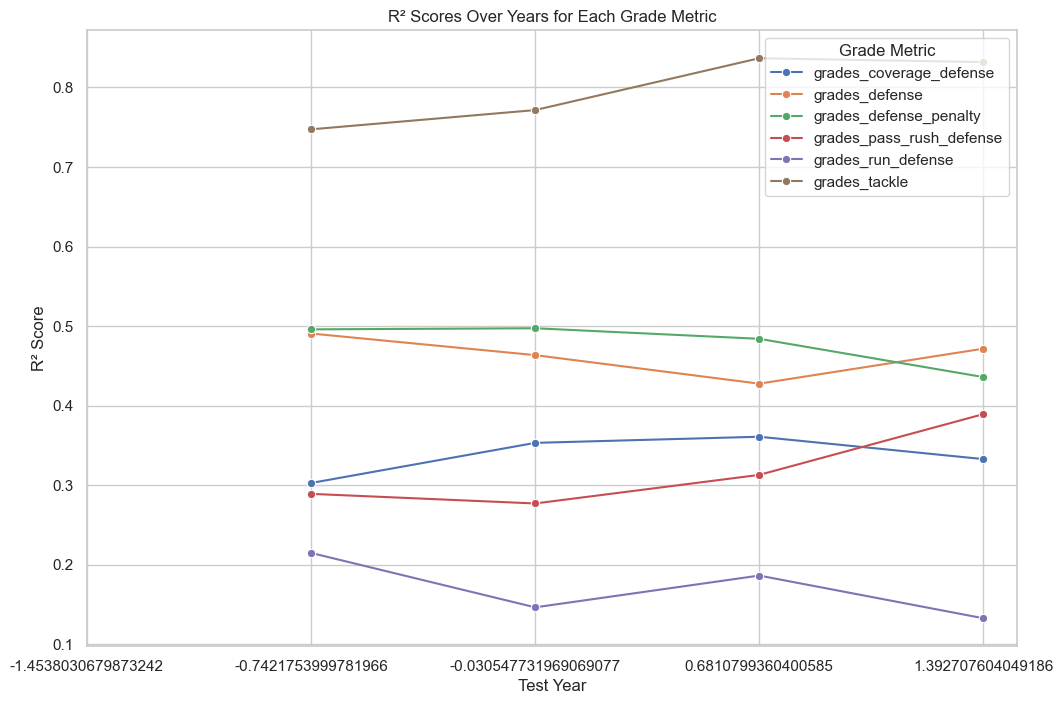

In [ ]:
# Assuming unique_years is a sorted list of years
unique_years = sorted(filtered_Df_scaled['year'].unique())

# Initialize list to store all metrics
all_metrics = []

for i in range(len(unique_years) - 1):
    train_year = unique_years[i]
    test_year = unique_years[i + 1]
    
    print(f"\n--- Training on {train_year} and Testing on {test_year} ---")
    
    # Split the data
    train_df = filtered_Df_scaled[filtered_Df_scaled['year'] == train_year]
    test_df = filtered_Df_scaled[filtered_Df_scaled['year'] == test_year]
    
    # Check if training or testing set is empty
    if train_df.empty:
        print(f"No data available for training year {train_year}. Skipping this split.")
        continue
    if test_df.empty:
        print(f"No data available for testing year {test_year}. Skipping this split.")
        continue
    
    X_train = train_df[feature_columns]
    y_train = train_df[targets]
    X_test = test_df[feature_columns]
    y_test = test_df[targets]
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Reshape for LSTM
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    # Define LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(len(targets), activation='linear'))
    
    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Define early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    history_lstm = model_lstm.fit(
        X_train_reshaped, y_train,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )
    
    # Predict on the test set
    y_pred = model_lstm.predict(X_test_reshaped)
    
    # Create predictions DataFrame with 'Predicted_' prefix
    predictions = pd.DataFrame(y_pred, columns=targets).rename(columns=lambda x: f"Predicted_{x}").reset_index(drop=True)
    
    # Create actuals DataFrame
    results = pd.DataFrame(y_test).reset_index(drop=True)
    
    # Concatenate into comparision_attention
    comparision_attention = pd.concat([results, predictions], axis=1)
    comparision_attention.columns = [f"Actual_{col}" for col in targets] + [f"Predicted_{col}" for col in targets]
    
    # Verify columns
    print("comparision_attention DataFrame Columns:", comparision_attention.columns.tolist())
    
    # Calculate metrics for each grade
    for grade in targets:
        actual = comparision_attention[f"Actual_{grade}"]
        predicted = comparision_attention[f"Predicted_{grade}"]
        
        mse = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, predicted)
        
        # Append metrics to the summary list
        all_metrics.append({
            'Train Year': train_year,
            'Test Year': test_year,
            'Grade': grade,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        })
        
        print(f"{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
# Convert all_metrics to DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics summary
print("\n=== Evaluation Metrics Summary ===")
print(metrics_df)

# Visualize R² Scores Over Years for Each Grade
plt.figure(figsize=(12, 8))
sns.lineplot(data=metrics_df, x='Test Year', y='R2', hue='Grade', marker='o')
plt.title('R² Scores Over Years for Each Grade Metric')
plt.xlabel('Test Year')
plt.ylabel('R² Score')
#unique_years = [2018, 2019, 2020, 2021, 2022]

plt.xticks(ticks=unique_years, labels=unique_years)

plt.legend(title='Grade Metric')
plt.grid(True)
plt.show()


In [ ]:
# now we implement a recurrent neural network

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
X_train_reshaped = X_train_scaled_df.values.reshape((X_train_scaled_df.shape[0], 1, X_train_scaled_df.shape[1]))
X_test_reshaped = X_test_scaled_df.values.reshape((X_test_scaled_df.shape[0], 1, X_test_scaled_df.shape[1]))

# Define Standard RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(len(targets), activation='linear'))

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Check the shape of X_train_scaled_df
print("Shape of X_train_scaled_df:", X_train_scaled_df.shape)

# Check the shape of y_train
print("Shape of y_train:", y_train.shape)

# After reshaping
print("Shape of X_train_reshaped:", X_train_reshaped.shape)


Shape of X_train_scaled_df: (2963, 45)
Shape of y_train: (778, 6)
Shape of X_train_reshaped: (2963, 1, 45)
